In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

## 32 ##
Orig: C1=NC(=O)[C@H]2[C@H]([C@@H]1O)N[C@H](N2)N[C@H]3[C@@H]([C@@H]([C@H]([C@H](O3)CO)OC(=O)N)O)NC(=O)CC(CCCNC(=O)CC(CCCN)N)N.OS(=O)(=O)O.OS(=O)(=O)O
Gold: NCCCC(N)CC(=O)NCCCC(N)CC(=O)N[C@@H]1[C@H](O)[C@@H](OC(N)=O)[C@@H](CO)O[C@H]1N[C@H]1N[C@H]2C(=O)N=C[C@@H](O)[C@@H]2N1.O=S(=O)(O)O.O=S(=O)(O)O
Pred: C1=NC(=O)[C@@H]2[C@H]([C@@H]1O)N[C@H](S2)N[C@@H](CO)[C@H](CNC(=O)CCCCCNC(=O)CC(CCCN)N)O[C@H](CO)OC(=O)N.OS(=O)(=O)O.OS(=O)(=O)O
Post: NCCCC(N)CC(=O)NCCCCCC(=O)NC[C@H](O[C@H](CO)OC(N)=O)[C@H](CO)N[C@@H]1N[C@H]2[C@H](O)C=NC(=O)[C@H]2S1.O=S(=O)(O)O.O=S(=O)(O)O
(1309, 2218, 3)
2 4 6 5
5 8 6 5
6 7 5 6
9 11 5 6
11 12 5 6
15 17 5 6


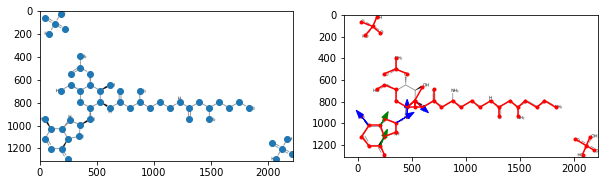

## 46 ##
Orig: CCCCCCCCCCCCCC[N+](C)(C)CC(=O)O[C@H]1CC[C@@]2(C3CCC4C5[C@@H](CC[C@@]5(CC[C@]4([C@@]3(CCC2C1(C)C)C)C)CO)C(=C)C)C
Gold: C=C(C)[C@@H]1CC[C@]2(CO)CC[C@]3(C)C(CCC4[C@@]5(C)CC[C@H](OC(=O)C[N+](C)(C)CCCCCCCCCCCCCC)C(C)(C)C5CC[C@]43C)C12
Pred: CCCCCCCCCCCCCC[N+](C)(C)CC(C)O[C@@H]1CC[C@]2(C(C1(C)C)CC[C@@]3(C2CCC([C@]3(CC)C)C4[C@@H](CC[C@H]4C(=C)I)/C=O)C)C
Post: C=C(I)[C@@H]1CC[C@@H](C=O)C1C1CCC2[C@@]3(C)CC[C@@H](OC(C)C[N+](C)(C)CCCCCCCCCCCCCC)C(C)(C)C3CC[C@@]2(C)[C@]1(C)CC
(700, 2385, 3)
20 21 6 5
24 50 6 5
24 51 6 5
36 37 6 5
36 39 5 6
41 42 6 5
41 48 6 5
44 45 5 6


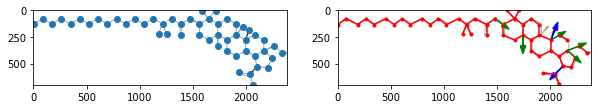

## 70 ##
Orig: CC1=CC(=C(N1[C@H](C)COC)C)C(=O)COC(=O)C2=CC=CC=C2CC3=CC=CC=C3
Gold: COC[C@@H](C)n1c(C)cc(C(=O)COC(=O)c2ccccc2Cc2ccccc2)c1C
Pred: CC1=CC(=C(N1[C@@H](C)COC)C)C(=O)COC(=O)C2=CC=CC=C2CC3=CC=CC=C3
Post: COC[C@H](C)n1c(C)cc(C(=O)COC(=O)c2ccccc2Cc2ccccc2)c1C
(612, 1132, 3)
6 7 6 5


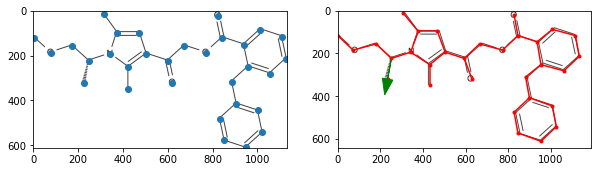

## 87 ##
Orig: CCCCCCCCCCCCCCCC(=O)OCCS[Sn](C)(SCCOC(=O)CCCCCCCCCCCCCCC)SCCOC(=O)CCCCCCCCCCCCCCC
Gold: CCCCCCCCCCCCCCCC(=O)OCCS[Sn](C)(SCCOC(=O)CCCCCCCCCCCCCCC)SCCOC(=O)CCCCCCCCCCCCCCC
Pred: CCCCCCCCCCCCCCCC(=O)OCCOCCCCOC(=O)CCCCCCCCCCCCCCC)OCCCCCC(=O)CCCCOCCOC(=O)CCCCCCCCCCCCCC
Post: CCCCCCCCCCCCCCCC(=O)OCCOCCCCOC(=O)CCCCCCCCCCCCCCC)OCCCCCC(=O)CCCCOCCOC(=O)CCCCCCCCCCCCCC
(2604, 3007, 3)


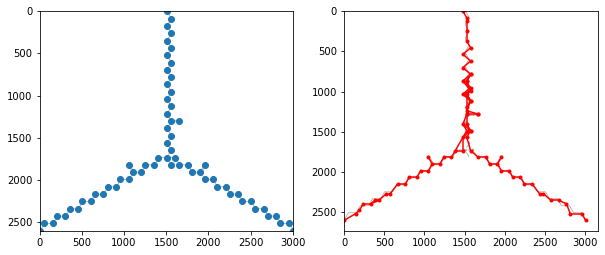

## 90 ##
Orig: [F-].[F-].[Hg+2]
Gold: [F-].[F-].[Hg+2]
Pred: [F-].[F-].
Post: [F-].[F-].
(162, 158, 3)


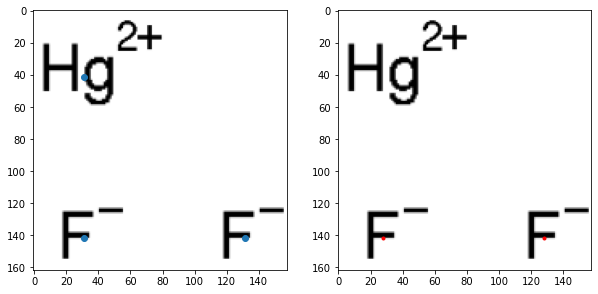

## 115 ##
Orig: CCCCCC(=O)N(CCCC)CC1C(C(C(C(O1)OC2C(CC(C(C2O)OC3C(C(C(C(O3)CNC(=O)OC(C)(C)C)O)O)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C)O)NC(=O)OC(C)(C)C)O
Gold: CCCCCC(=O)N(CCCC)CC1OC(OC2C(NC(=O)OC(C)(C)C)CC(NC(=O)OC(C)(C)C)C(OC3OC(CNC(=O)OC(C)(C)C)C(O)C(O)C3NC(=O)OC(C)(C)C)C2O)C(O)C(NC(=O)OC(C)(C)C)C1O
Pred: CCCCCC(=O)N(CCCC)CC1C(C(C(C(O1)OC2C(CC(C(C2O)OC3C(C(C(C(O3)CNC(=O)OC(C)(C)C)O)O)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C)NC(=O)OC(C
Post: CCCCCC(=O)N(CCCC)CC1C(C(C(C(O1)OC2C(CC(C(C2O)OC3C(C(C(C(O3)CNC(=O)OC(C)(C)C)O)O)NC(=O)OC(C)(C)C)NC(=O)OC(C)(C)C)NC(=O)OC(C
(1290, 1394, 3)


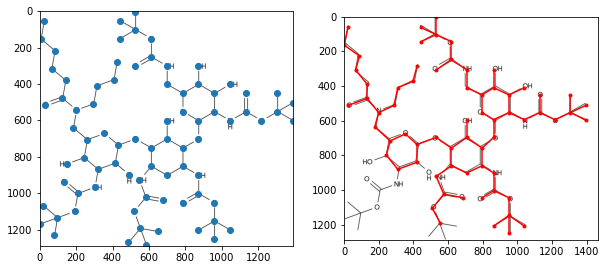

## 125 ##
Orig: COC1=CC(=CC(=C1C2C(=CCC3C2(C(=O)N(C3=O)C4=CC(=CC=C4)Cl)C5=CC=CC=C5)C=C)OC)O
Gold: C=CC1=CCC2C(=O)N(c3cccc(Cl)c3)C(=O)C2(c2ccccc2)C1c1c(OC)cc(O)cc1OC
Pred: COC1=CC(=CC(=C1)O)OC2C(=CCC3C2(C(=O)N(C3=O)C4=CC(=CC=C4)Cl)C5=CC=CC=C5)C=C
Post: C=CC1=CCC2C(=O)N(c3cccc(Cl)c3)C(=O)C2(c2ccccc2)C1Oc1cc(O)cc(OC)c1
(519, 942, 3)


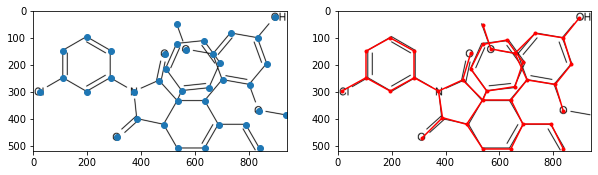

## 134 ##
Orig: C1C[C@@H]2CN(CCN(CCN(C[C@H](C1)N2CC(=O)O)CC(=O)O)CC(=O)O)CC(=O)O.[Gd+3]
Gold: O=C(O)CN1CCN(CC(=O)O)C[C@@H]2CCC[C@H](CN(CC(=O)O)CC1)N2CC(=O)O.[Gd+3]
Pred: C1C[C@@H]2CN(CCN(CCN(C[C@@H]3C1)CC(=O)O)CC(=O)O)CC(=O)O.[Ca+2]
Post: C1C[C@@H]2CN(CCN(CCN(C[C@@H]3C1)CC(=O)O)CC(=O)O)CC(=O)O.[Ca+2]
(655, 1085, 3)
1 2 5 6
11 12 5 6


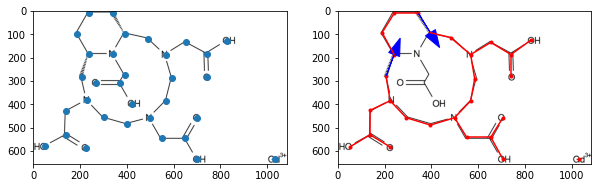

## 164 ##
Orig: CCC(CC)COC(=O)C1=C(N(C2=NC3=CC=CC=C3N=C12)[C@@H](C)C4=CC=CC=C4)N
Gold: CCC(CC)COC(=O)c1c(N)n([C@@H](C)c2ccccc2)c2nc3ccccc3nc12
Pred: CCC(CC)COC(=O)C1=C(N(C2=NC3=CC=CC=C3N=C12)[C@H](C)C4=CC=CC=C4)N
Post: CCC(CC)COC(=O)c1c(N)n([C@H](C)c2ccccc2)c2nc3ccccc3nc12
(672, 963, 3)
22 23 6 5


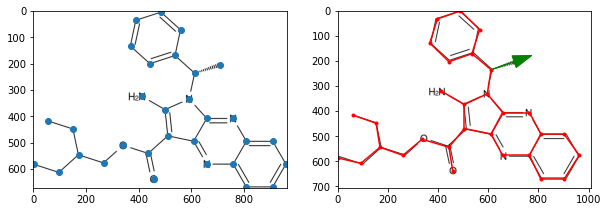

## 167 ##
Orig: C1C[C@]2([C@H]3CC[C@H](C3)CC2=O)OC1
Gold: O=C1C[C@@H]2CC[C@@H](C2)[C@]12CCCO2
Pred: C1[C@@H]2CC(=O)[C@]3([C@H]1C[C@@H]2CCO3)C2=C2
Post: C1[C@@H]2CC(=O)[C@]3([C@H]1C[C@@H]2CCO3)C2=C2
(238, 359, 3)
5 12 5 6
6 7 5 6
7 8 6 5


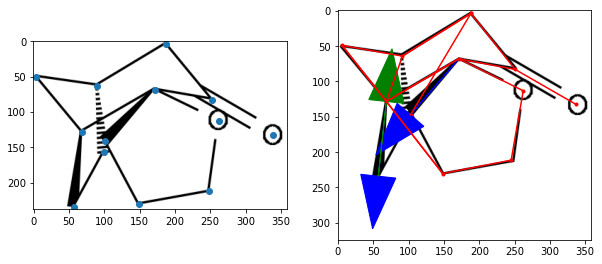

## 181 ##
Orig: C[C@@H]1CN2[C@@H]([C@@H](O1)C)[C@]3(CC4=C2C=CC(=C4)[N+](=O)[O-])C(=O)NC(=O)N(C3=O)C(C)C
Gold: CC(C)N1C(=O)NC(=O)[C@]2(Cc3cc([N+](=O)[O-])ccc3N3C[C@@H](C)O[C@@H](C)[C@H]32)C1=O
Pred: C[C@@H]1CN2[C@@H]([C@H](O1)C)[C@@]3(CC4=C2C=CC(=C4)[N+](=O)[O-])C(=O)N(C(=O)NC3=O)C(C)C
Post: CC(C)N1C(=O)NC(=O)[C@]2(Cc3cc([N+](=O)[O-])ccc3N3C[C@@H](C)O[C@H](C)[C@H]32)C1=O
(715, 723, 3)
0 1 6 5
3 4 6 5
5 7 5 6
8 19 6 5


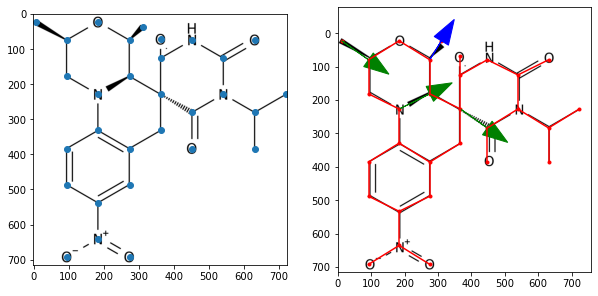

## 193 ##
Orig: CCC1=C(C2=NC1=CC3=C(C4=C([C@@H](C(=C5[C@H](CC(=CC6=NC(=C2)C(=C6C)C=C)N5)CCC(=O)O)C4=N3)C(=O)OC)O)C)C
Gold: C=CC1=C(C)C2=NC1=CC1=NC(=CC3=C(C)C4=C(O)[C@H](C(=O)OC)C(=C5NC(=C2)C[C@@H]5CCC(=O)O)C4=N3)C(CC)=C1C
Pred: CCC1=C(C2=NC1=CC3=C(C4=C([C@@H](C(=C5[C@H](CC(=CC6=NC(=C2)C(=C6C)C=C)N5)CCC(=O)O)C(=O)OC)C4=N3)O)C)C
Post: C=CC1=C(C)C2=N/C1=C\C1=N/C(=C\C3=C(C)C4=C(O)[C@H](C4=N3)/C(C(=O)OC)=C3/N/C(=C\2)C[C@@H]3CCC(=O)O)C(CC)=C1C
(842, 1101, 3)
12 34 6 5
15 29 5 6


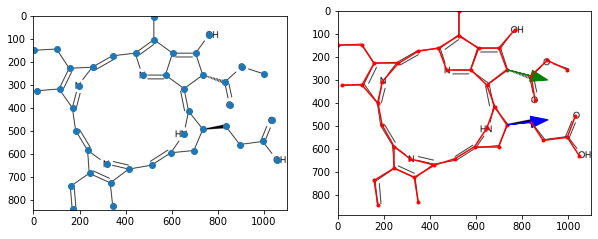

## 227 ##
Orig: CC1=CC2=C(C=C1C)N(C=N2)[C@@H]3[C@@H]([C@@H]([C@H](O3)CO)OP(=O)(O)O[C@H](C)CNC(=O)CC[C@@]4([C@H]([C@@H]5[C@]6([C@@]([C@@H](C(=N6)/C(=C\7/[C@@]([C@@H](C(=CC8=NC(=C(C4=N5)C)[C@H](C8(C)C)CCC(=O)N)N7)CCC(=O)N)(C)CC(=O)N)/C)CCC(=O)N)(C)CC(=O)N)C)CC(=O)N)C)O
Gold: CC1=C2N=C(C=C3N/C(=C(/C)C4=N[C@@](C)([C@@H]5N=C1[C@](C)(CCC(=O)NC[C@@H](C)OP(=O)(O)O[C@@H]1[C@@H](CO)O[C@H](n6cnc7cc(C)c(C)cc76)[C@@H]1O)[C@H]5CC(N)=O)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)[C@@](C)(CC(N)=O)[C@@H]3CCC(N)=O)C(C)(C)[C@@H]2CCC(N)=O
Pred: CC1=CC2=C(C=C1I)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H](O3)CO)O[Si](=O)(O)O[C@H](C)CNC(=O)CC[C@@]4(C)C[C@@H]5[C@]([C@@H](C(=N5)/C(=N/[C@]([C@@H](/C(=C/C6=N/[C@H](C(=C(/C4)\C)/[C@H](C6(C)C)CCC(=O)O)/N
Post: CC1=CC2=C(C=C1I)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H](O3)CO)O[Si](=O)(O)O[C@H](C)CNC(=O)CC[C@@]4(C)C[C@@H]5[C@]([C@@H](C(=N5)/C(=N/[C@]([C@@H](/C(=C/C6=N/[C@H](C(=C(/C4)\C)/[C@H](C6(C)C)CCC(=O)O)/N
(1095, 2366, 3)
8 11 6 5
13 18 5 6
14 16 6 5
23 24 6 5
31 32 6 5
47 56 5 6
52 56 5 6


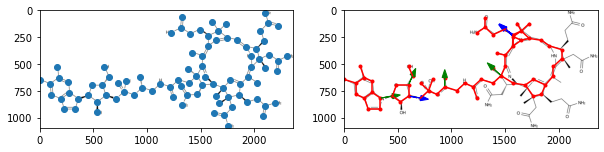

## 265 ##
Orig: CN1C2=CC(=C(C=C2N=C(C1=O)CCN3C(=O)N4CC=C5C(N4C3=O)CC6C(=O)N(C(=O)C6(C5C7=C(C=CC8=CC=CC=C87)O)C9=CC=C(C=C9)Cl)NC1=C(C=C(C=N1)C(F)(F)F)Cl)OC)OC
Gold: COc1cc2nc(CCn3c(=O)n4n(c3=O)C3CC5C(=O)N(Nc6ncc(C(F)(F)F)cc6Cl)C(=O)C5(c5ccc(Cl)cc5)C(c5c(O)ccc6ccccc56)C3=CC4)c(=O)n(C)c2cc1OC
Pred: CN1C2=CC(=C(C=C2N=C(C1=O)CCN3C(=O)N4CC=C5C(N4C3=O)CC6C(=O)N(C(=O)C6(C5C7=C(C=C6)Cl)C8=CC(=CC=C7C7=CC=CC=C7)O)NC9=C(C=C(C=N9)C(F)(F)F
Post: CN1C2=CC(=C(C=C2N=C(C1=O)CCN3C(=O)N4CC=C5C(N4C3=O)CC6C(=O)N(C(=O)C6(C5C7=C(C=C6)Cl)C8=CC(=CC=C7C7=CC=CC=C7)O)NC9=C(C=C(C=N9)C(F)(F)F
(1132, 1557, 3)


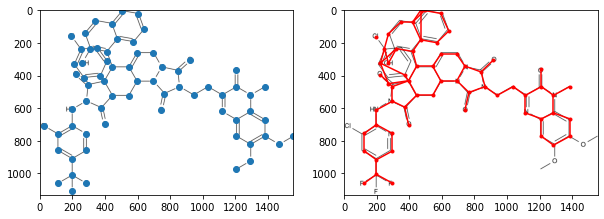

## 266 ##
Orig: C[C@@H](COCC1=CC=CC=C1)[C@@]23CCCCC[C@@H](C2(C)C)O[Si](O3)(C)C
Gold: C[C@@H](COCc1ccccc1)[C@]12CCCCC[C@H](O[Si](C)(C)O1)C2(C)C
Pred: C[C@@H](COCC1=CC=CC=C1)[C@]23CCCCC[C@@H](C2(C)C)O[Si](O3)(C)C
Post: C[C@@H](COCc1ccccc1)[C@@]12CCCCC[C@H](O[Si](C)(C)O1)C2(C)C
(457, 853, 3)
0 1 6 5
11 23 6 5
16 17 5 6


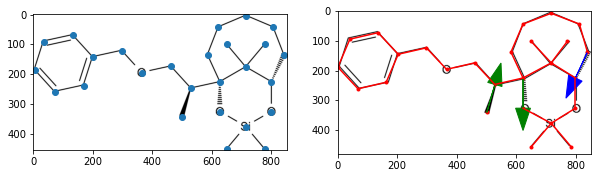

## 267 ##
Orig: C1=CC(=CC=C1CN)S(=O)(=O)N.C1=CC(=CC=C1N)S(=O)(=O)NC(=S)N
Gold: NC(=S)NS(=O)(=O)c1ccc(N)cc1.NCc1ccc(S(N)(=O)=O)cc1
Pred: C1=CC(=CC=C1N)S(=O)(=O)NC(=S)N.C1=CC(=CC=C1CN)S(=O)(=O)N.C1=CC(=CC=C1N)S(=O)(=O)NC(=S)N
Post: NC(=S)NS(=O)(=O)c1ccc(N)cc1.NC(=S)NS(=O)(=O)c1ccc(N)cc1.NCc1ccc(S(N)(=O)=O)cc1
(316, 1515, 3)


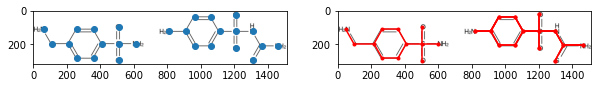

## 310 ##
Orig: C[C@@H]1CC=C2[C@H]([C@@]1(CCOCC3=CC=C(C=C3)OC)COC(=S)SC)CCC[C@@]2(C)CCCC(=C)C
Gold: C=C(C)CCC[C@]1(C)CCC[C@@H]2C1=CC[C@@H](C)[C@]2(CCOCc1ccc(OC)cc1)COC(=S)SC
Pred: C[C@@H]1CC=C2[C@H]([C@]1(CCOCC3=CC=C(C=C3)OC)COC(=S)SC)CCC[C@@]2(C)CCCC(=C)C
Post: C=C(C)CCC[C@]1(C)CCC[C@@H]2C1=CC[C@@H](C)[C@@]2(CCOCc1ccc(OC)cc1)COC(=S)SC
(765, 1177, 3)
0 1 5 6
4 5 6 5
6 19 5 6
28 29 5 6


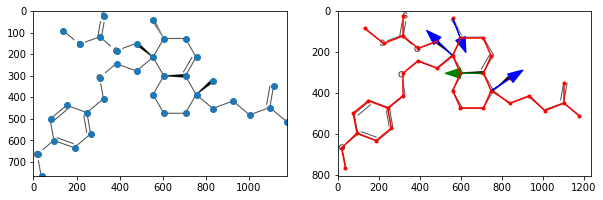

## 322 ##
Orig: C=CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)COCC2=CC=CC=C2)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)COCC4=CC=CC=C4)O)OCC5=CC=CC=C5)OCC6=CC=CC=C6)OCC7=CC=CC=C7)OCC8=CC=CC=C8
Gold: C=CCCCCCCCCCO[C@@H]1O[C@H](COCc2ccccc2)[C@@H](O[C@@H]2O[C@H](COCc3ccccc3)[C@H](O)[C@H](OCc3ccccc3)[C@H]2OCc2ccccc2)[C@H](OCc2ccccc2)[C@H]1OCc1ccccc1
Pred: C=CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)COCC2=CC=CC=C2)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)COCC4=CC=CC=C4)O)OCC5=CC=CC=C5)OCC6=CC=CC=C6)OCC7=CC=CC=C7)OC
Post: C=CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)COCC2=CC=CC=C2)O[C@H]3[C@@H]([C@H]([C@H]([C@H](O3)COCC4=CC=CC=C4)O)OCC5=CC=CC=C5)OCC6=CC=CC=C6)OCC7=CC=CC=C7)OC
(1408, 1826, 3)
11 12 6 5
13 68 6 5
14 60 5 6
15 27 6 5
16 18 5 6
27 28 6 5
29 52 6 5
30 44 5 6
31 43 5 6
32 34 5 6


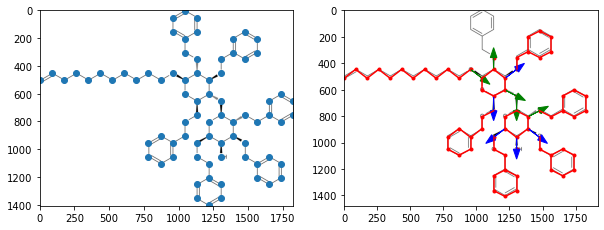

## 357 ##
Orig: C[C@]1(C[C@H](NCN1C)C(=O)O)COC(=O)C2=CC(=CN2)Br
Gold: CN1CN[C@H](C(=O)O)C[C@@]1(C)COC(=O)c1cc(Br)c[nH]1
Pred: C[C@@]1(C[C@H](NCN1C)C(=O)O)COC(=O)C2=CC(=CN2)Br
Post: CN1CN[C@H](C(=O)O)C[C@]1(C)COC(=O)c1cc(Br)c[nH]1
(488, 930, 3)
0 1 5 6
3 8 6 5


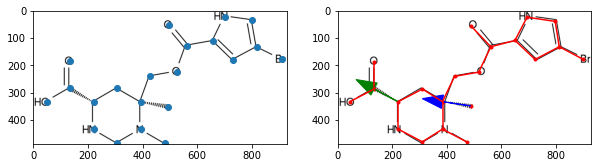

## 370 ##
Orig: C[Si](C)(C)O[C@H]([C@H]1CCCCC1=O)C2=CC=CO2
Gold: C[Si](C)(C)O[C@@H](c1ccco1)[C@H]1CCCCC1=O
Pred: C[Si](C)(C)O[C@@H]([C@H]1CCCCC1=O)C2=CC=CO2
Post: C[Si](C)(C)O[C@H](c1ccco1)[C@H]1CCCCC1=O
(444, 556, 3)
4 5 5 6
6 7 6 5


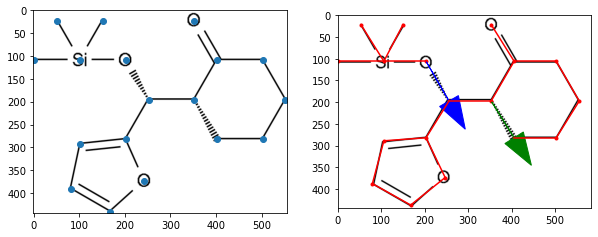

In [78]:
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bms.dataset import generate_indigo_image
from bms.tokenizer import NodeTokenizer
from bms.chemistry import canonicalize_smiles, convert_smiles_to_inchi, _postprocess_smiles

from indigo import Indigo
from indigo.renderer import IndigoRenderer
import rdkit.Chem as Chem

# df = pd.read_csv('../data/molbank/indigo-data/valid.csv')
df = pd.read_csv('../data/molbank/pubchem/valid.csv')
# smiles_pred_df = pd.read_csv('../output/indigo/swin_base_50_lstm/prediction_valid.csv')
# nodes_pred_df = pd.read_csv('../output/indigo/swin_base_edges_bin64_ep100_sep/prediction_valid.csv')
nodes_pred_df = pd.read_csv('../output/pubchem/swin_base_200k_jointedges/prediction_valid.csv')

tokenizer = NodeTokenizer(50)

def normalize_nodes(nodes):
    x, y = nodes[:, 0], nodes[:, 1]
    minx, maxx = min(x), max(x)
    miny, maxy = min(y), max(y)
    x = (x - minx) / max(maxx - minx, 1e-6)
    y = (maxy - y) / max(maxy - miny, 1e-6)
    return np.stack([x, y], axis=1)

def get_nodes(smiles):
    indigo = Indigo()
    renderer = IndigoRenderer(indigo)
    indigo.setOption('render-output-format', 'png')
    indigo.setOption('render-background-color', '1,1,1')
    indigo.setOption('render-stereo-style', 'none')
    indigo.setOption('render-label-mode', 'hetero')
    mol = indigo.loadMolecule(smiles)
    img = renderer.renderToBuffer(mol)
    mol.layout()
    nodes = []
    for atom in mol.iterateAtoms():
        x, y = atom.coords()
        nodes.append([x, y])
    nodes = np.array(nodes)
    return nodes


count = 0

for i, row in df.iterrows():
    if count == 20:
        break
    assert row['image_id'] == nodes_pred_df.loc[i, 'image_id']
    smiles = row['SMILES']
    gold_smiles = canonicalize_smiles(smiles)
    pred_smiles = nodes_pred_df.loc[i, 'SMILES']
    post_smiles = nodes_pred_df.loc[i, 'post_SMILES']
    if gold_smiles == post_smiles:
        continue
    if gold_smiles.replace('/', '').replace('\\', '') == post_smiles.replace('/', '').replace('\\', ''):
        continue
    count += 1
    print(f'## {i} ##')
    print('Orig:', smiles)
    print('Gold:', gold_smiles)
    print('Pred:', pred_smiles)
    print('Post:', post_smiles)
    path = '../' + row['file_path']
    img = cv2.imread(path)
    print(img.shape)
    h, w, _ = img.shape
    nodes = get_nodes(smiles)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.scatter(nodes[:,0], nodes[:,1])
    plt.subplot(1,2,2)
    plt.imshow(img)
    coords = np.array(eval(nodes_pred_df.loc[i, 'node_coords']))
    symbols = np.array(eval(nodes_pred_df.loc[i, 'node_symbols']))
    x, y = coords[:,1]*w, coords[:,0]*h
    plt.scatter(x, y, color='r', marker='.')
    edges = eval(nodes_pred_df.loc[i, 'edges'])
#     post_smiles = _postprocess_smiles(pred_smiles, coords, symbols, edges)
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            if edges[i][j] != 0:
                if edges[i][j] in [5, 6]:
                    color = 'blue' if edges[i][j] == 5 else 'green'
                    plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=50)
                    print(i, j, edges[i][j], edges[j][i])
                else:
                    color = 'red'
                    plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()
#     mol0 = Chem.MolFromSmiles(canon_gold, sanitize=False)
#     mol = Chem.MolFromSmiles(canon_pred, sanitize=False)
#     try:
#         img = Chem.Draw.MolsToGridImage([mol0,mol], subImgSize=(250,250), molsPerRow=2, useSVG=True)
#         display(img)
#     except:
#         pass

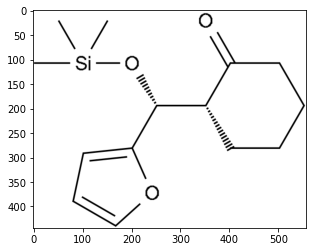

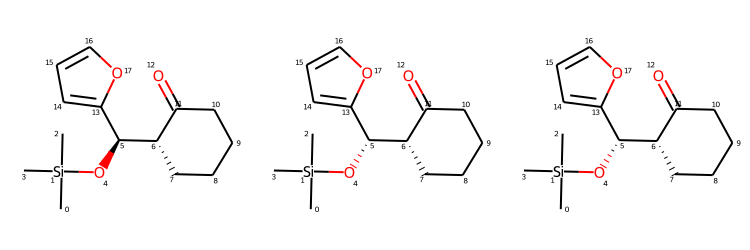

[[0.047619047619047616, 0.2698412698412698], [0.23809523809523808, 0.19047619047619047], [0.23809523809523808, 0.0], [0.047619047619047616, 0.09523809523809523], [0.23809523809523808, 0.36507936507936506], [0.4444444444444444, 0.4603174603174603], [0.4444444444444444, 0.6349206349206349], [0.6349206349206349, 0.7301587301587301], [0.6349206349206349, 0.9047619047619048], [0.4444444444444444, 1.0], [0.23809523809523808, 0.9047619047619048], [0.23809523809523808, 0.7301587301587301], [0.047619047619047616, 0.6349206349206349], [0.6349206349206349, 0.36507936507936506], [0.6507936507936508, 0.19047619047619047], [0.873015873015873, 0.14285714285714285], [0.9841269841269841, 0.30158730158730157], [0.8412698412698413, 0.4444444444444444]]
['C', '[Si]', 'C', 'C', 'O', '[C@@H]', '[C@H]', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', 'C', 'C', 'O']
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

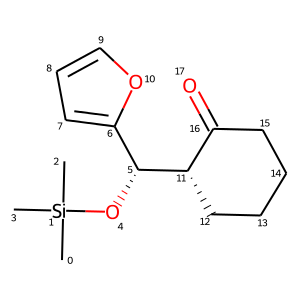

In [102]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
from bms.chemistry import _verify_chirality

i = 370
gold_smiles = df.loc[i, 'SMILES']
path = '../' + df.loc[i, 'file_path']
img = cv2.imread(path)
plt.imshow(img)
plt.show()

pred_row = nodes_pred_df.loc[i]
pred_smiles = pred_row['SMILES']
post_smiles = pred_row['SMILES']
coords = eval(pred_row['node_coords'])
symbols = eval(pred_row['node_symbols'])
edges = eval(pred_row['edges'])
mol_gold = Chem.MolFromSmiles(gold_smiles)
mol_pred = Chem.MolFromSmiles(pred_smiles)
mol_post = Chem.MolFromSmiles(post_smiles)
img = Chem.Draw.MolsToGridImage([mol_gold,mol_pred,mol_post], subImgSize=(250,250), molsPerRow=3, useSVG=True)
display(img)
# chiral_centers = Chem.FindMolChiralCenters(mol, includeUnassigned=True, includeCIP=False, useLegacyImplementation=False)
# print(chiral_centers)
mol = _verify_chirality(mol_pred, coords, symbols, edges)
smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)

print(coords)
print(symbols)
print(edges)

mol = Chem.MolFromSmiles(smiles)
mol

In [27]:
df = pd.read_csv('../data/molbank/indigo-data/valid.csv')
nodes_pred_df = pd.read_csv('../output/indigo/swin_base_edges_bin64_ep100/prediction_valid.csv')
grid_pred_df = pd.read_csv('../output/indigo/swin_base_grid_ep100/prediction_valid.csv')

def get_num_atoms(smiles):
    indigo = Indigo()
    mol = indigo.loadMolecule(smiles)
    return mol.countAtoms()

num_atoms = [get_num_atoms(smiles) for smiles in df['SMILES']]
df['num_atoms'] = num_atoms

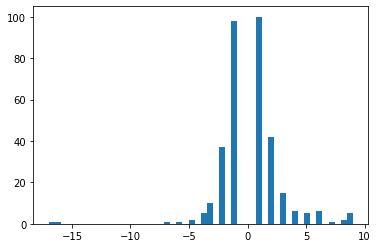

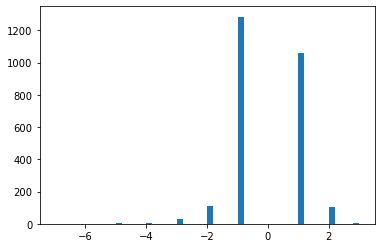

In [19]:
def plot_df(pred_df, num_atoms):
    pred_num_atoms = [len(eval(s)) for s in pred_df['node_symbols']]
    diff = np.array(pred_num_atoms) - np.array(num_atoms)
    diff = [d for d in diff if d != 0]
    plt.hist(diff, bins=50)
    plt.show()
    
plot_df(nodes_pred_df, num_atoms)
plot_df(grid_pred_df, num_atoms)

In [ ]:
from tqdm import tqdm
from bms.dataset import generate_indigo_image

df = pd.read_csv('../data/molbank/pubchem/train_200k.csv')
tokenizer = NodeTokenizer(64, '../bms/vocab.json', True)

n_fail = 0

for i, row in tqdm(df.iterrows()):
    smiles = row['SMILES']
    img, smiles, graph, success = generate_indigo_image(smiles, mol_augment=False)
    if not success:
        n_fail += 1
        print('FAIL:', n_fail)
        continue
    labels = tokenizer.smiles_coords_to_sequence(smiles, graph['coords'])

0.027054769467791062


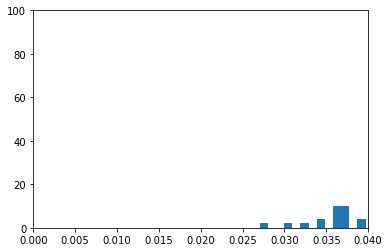

In [36]:
print(min(dists))
plt.hist(dists, 1000)
plt.xlim(0,0.04)
plt.ylim(0, 100)
plt.show()

C=N
0 1


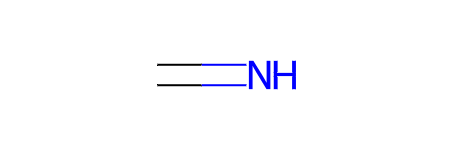

In [34]:
import rdkit.Chem as Chem

mol = Chem.RWMol()
s = mol.AddAtom(Chem.Atom('C'))
t = mol.AddAtom(Chem.Atom('N'))
mol.AddBond(s, t, Chem.BondType.DOUBLE)
print(Chem.MolToSmiles(mol.GetMol()))
print(s,t)
mol